## Метод K ближайших соседей (K nearest neighbours, KNN)
**Идея:** делать предсказание на основе меток ближайших соседей

<center>
**Важные параметры (SkLearn):** 
</center>

| Параметр (SkLearn) | Параметр (лекция) | Описание                       |
|--------------------|-------------------|--------------------------------|
| n_neighbors       | K                 | Число соседей                  |
| weights            | $\gamma$          | "заряды", веса соседей         |
| metric             | K + $\rho$        | "Потенциал", ядро + расстояние |


<center>
**Формула:**
</center>

$$a(x, X^l) = sign(\Sigma_{i=1}^lw_iy_i\rho(x,x_i)))$$


![](https://kevinzakka.github.io/assets/1nearestneigh.png)
![](https://kevinzakka.github.io/assets/20nearestneigh.png)

# 1. Классификация

## 1.1. Загрузка данных
Давайте загрузим данные Ириса Фишера
![](https://kevinzakka.github.io/assets/flower.jpg)

In [1]:
# !pip install seaborn 
# если seaborn не импортируется, установите его этой командой (либо без "!" в командной строке, либо)
import seaborn as sns # библиотека для визуализации
df = sns.load_dataset("iris") # в seaborn и sklearn iris dataset идёт из коробки

## 1.2. Визуализация
Seaborn - отличный инструмент визуализации с большой [галереей](http://seaborn.pydata.org/examples/index.html) примеров

In [2]:
# df.head(100) # первые 100 строк
df.head() # выведем первые 5 строк таблицы

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


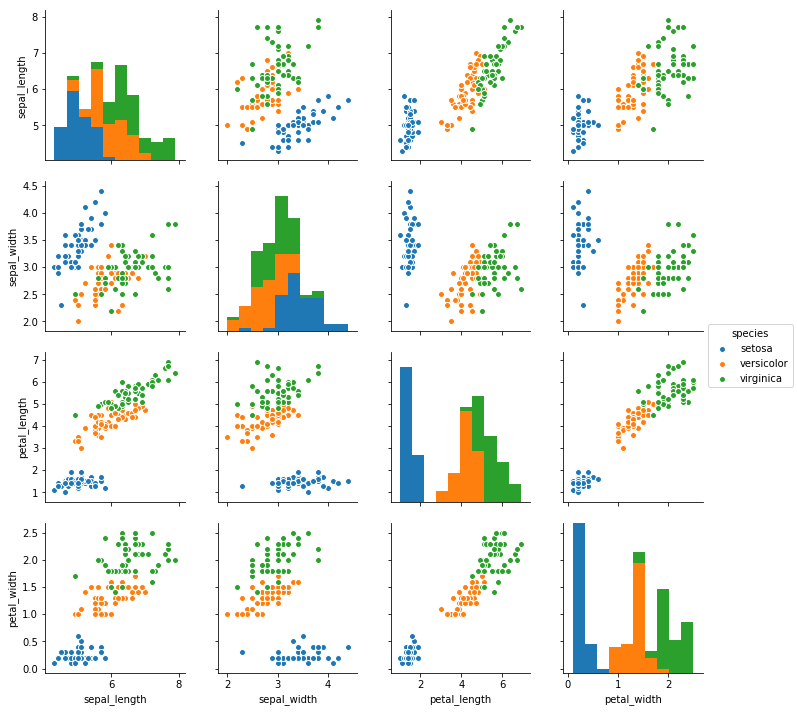

In [3]:
%matplotlib inline 
# %matplotlib inline - директива jupyter, которая позволяет рисовать графики в jupyter notebook
sns.pairplot(df, 'species') # диагональные элементы - гистограммы

## 1.3. Обучение модели
Давайте обучим модель и посмотрим на её качество. Запустите код несколько раз!

In [4]:
X = df.drop('species', 1) # возьмём в качестве объектов и признаков всё кроме колонки "species" (вид, разновидность цвета). 
# Метод .drop() выкидывает колонку "species". Если бы было .drop('species', 0), то выкинулась бы строка "species" 
y = df['species'] # в качестве целевой переменной возьмём вид цветка ("species")

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

clf = KNeighborsClassifier() # инициализируем классификатор с начальными параметрами. Сейчас классификатор не обучен
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8) # разобьём выборку на обучающую и на тестовую (80% данных на обучение)
clf.fit(X_train, y_train) # обучим классификатор, указав ему, какие объекты (X) какие метки классов (y) имеют. Иными словами, какое значение y соответствует каждому объекту из X
y_pred = clf.predict(X_test) # получим предсказания обученного классификатора для тестовой выборки

c:\users\artem\anaconda3\envs\wos\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Посмотрим на предсказания

In [6]:
print('\n'.join(['Real: {}, Predicted: {}'.format(y_2, y_1) for y_1, y_2 in zip(y_pred, y_test)]))

Real: virginica, Predicted: virginica
Real: setosa, Predicted: setosa
Real: versicolor, Predicted: versicolor
Real: setosa, Predicted: setosa
Real: virginica, Predicted: virginica
Real: versicolor, Predicted: versicolor
Real: versicolor, Predicted: versicolor
Real: versicolor, Predicted: versicolor
Real: virginica, Predicted: virginica
Real: setosa, Predicted: setosa
Real: versicolor, Predicted: versicolor
Real: versicolor, Predicted: versicolor
Real: versicolor, Predicted: versicolor
Real: setosa, Predicted: setosa
Real: versicolor, Predicted: versicolor
Real: virginica, Predicted: virginica
Real: virginica, Predicted: virginica
Real: setosa, Predicted: setosa
Real: setosa, Predicted: setosa
Real: versicolor, Predicted: versicolor
Real: setosa, Predicted: setosa
Real: virginica, Predicted: virginica
Real: virginica, Predicted: virginica
Real: setosa, Predicted: setosa
Real: virginica, Predicted: virginica
Real: virginica, Predicted: virginica
Real: setosa, Predicted: setosa
Real: seto

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) # доля правильных ответов

1.0

Какой вывод можно сделать из результатов?

## 1.4. Подбор параметров
В упражнении выше вы могли увидеть, как "скачет" качество алгоритма от раза к разу. Давайте посмотрим более правильный подход оценки качества, который поможет нам подобрать наилучшие гиперпараметры модели и оценить её качество. Этот подход называется кросс-валидацией
![](https://kevinzakka.github.io/assets/k_fold_cv.jpg)
Как он работает? Всё просто! Мы бьём наши прецеденты (пару x,y) случайным образом на K частей, далее на K - 1 части обучаемся, на 1 - тестируем. Делаем так поочерёдно для всех K частей, поочерёдно выкидывая каждую из обучающей выборки и тестируя алгоритм на ней, и усредняем результат. Таким образом можно более стабильно оценивать качество моделей и подбирать для неё наилучшие гиперпараметры

## 1.4.1. Посмотрим, как меняется качество от числа соседей
Попробуем поварьировать количество ближайших соседей

c:\users\artem\anaconda3\envs\wos\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


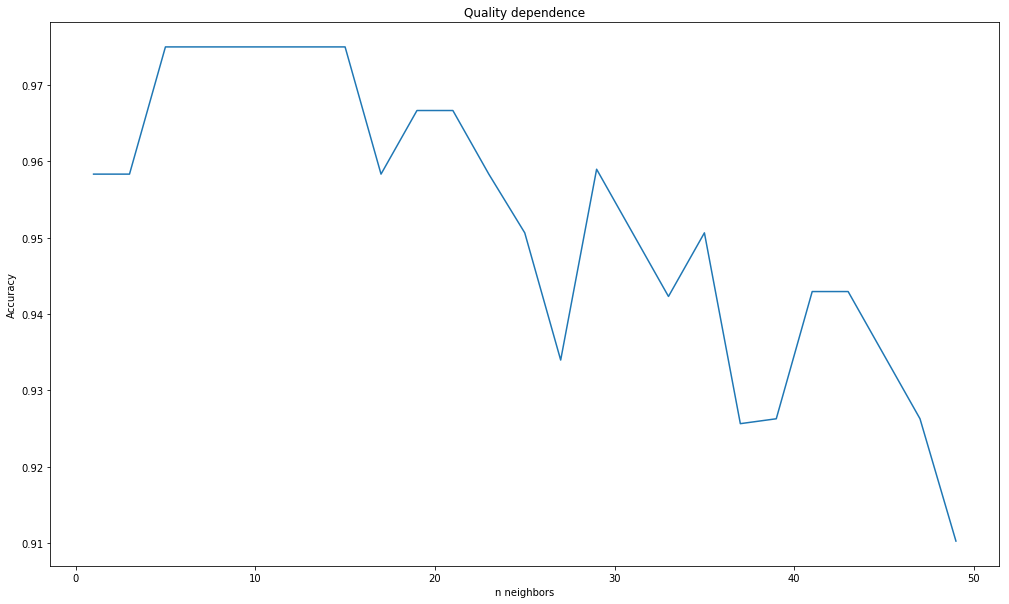

In [8]:
from sklearn.cross_validation import cross_val_score

neighbors = range(1,50,2) # количество ближайших соседей, по которому мы будем пробегаться и замерять качество

# empty list that will hold cv scores
cv_scores = []

for k in neighbors:
    clf = KNeighborsClassifier(n_neighbors=k) # необученный классификатор с числом соседей = k
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy') 
    # cross_val_score - разобьёт данные
    # cv - K из иллюстрации выше, scoring - метрика (можно задавать свою)
    cv_scores.append(scores.mean())

import matplotlib.pyplot as plt # подключение библиотеки для отрисовки графиков
plt.figure(figsize=(17,10)) # сделаем график большим
plt.title('Quality dependence') # зададим заголовок к графику
plt.xlabel('n neighbors')
plt.ylabel('Accuracy')
plt.plot(neighbors, cv_scores) # отрисуем график

А как же подобрать наилучшие параметры, особенно если их много? Можно, конечно, вручную запускать при каждых параметрах cross-validation, но в SkLearn всё уже сделано за вас!

In [9]:
from sklearn.grid_search import GridSearchCV
# здесь можно задать диапазон значений для параметров, которые мы хотим подобрать. 
# ЗАДАНИЕ! Подберите наилучшие на ваш взгляд параметры для данного классификатора (n_neighbors, weights, metric из описания выше. Подробнее смотрите здесь http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
params_grid = { 
    'n_neighbors': [1, 2]
}
gs = GridSearchCV(clf, params_grid, cv=5, verbose=2, scoring='accuracy') # Просто передаёте ему свой классификатор и он сам подберёт для него лучшие гиперпараметры! cv=K, где K - количество сплитов. verbose=0 - не выводить никакой информации, verbose > 0 - выводить больше информации (тем больше, чем больше verbose). scoring - метрика (можно передавать свою)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] n_neighbors=1 ...................................................
[CV] .......................................... n_neighbors=1 -   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .......................................... n_neighbors=1 -   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .......................................... n_neighbors=1 -   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .......................................... n_neighbors=1 -   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .......................................... n_neighbors=1 -   0.0s
[CV] n_neighbors=2 ...................................................
[CV] .......................................... n_neighbors=2 -   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ............

c:\users\artem\anaconda3\envs\wos\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=49, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2]}, pre_dispatch='2*n_jobs',
       refit=True, scoring='accuracy', verbose=2)

In [10]:
gs.best_score_ # наилучшее качество

0.9416666666666667

In [11]:
gs.best_params_ # наилучшие параметры

{'n_neighbors': 1}

In [12]:
best_clf = gs.best_estimator_ # наилучший классификатор
best_clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [13]:
best_clf.predict(X_test)

array(['virginica', 'setosa', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'virginica', 'setosa', 'setosa', 'versicolor',
       'setosa', 'virginica', 'virginica', 'setosa', 'versicolor',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica'], dtype=object)

# 2. Регрессия
Попробуем обучить модель регрессии для предсказания перегрева и переохлаждения майнинговых ферм

## 2.1 Загрузка данных
| Поле | Описание                          | Тип   |
|------|-----------------------------------|-------|
| X1   | Относительная компактность        | FLOAT |
| X2   | Площадь                           | FLOAT |
| X3   | Площадь стены                     | FLOAT |
| X4   | Площадь потолка                   | FLOAT |
| X5   | Общая высота                      | FLOAT |
| X6   | Ориентация                        | INT   |
| X7   | Площадь остекления                | FLOAT |
| X8   | Распределенная площадь остекления | INT   |
| y1   | Нагрузка при обогреве             | FLOAT |
| y2   | Нагрузка при охлаждении           | FLOAT |

In [14]:
import pandas as pd
df = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx') # загрузим эту таблицу данных

In [15]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## 2.2 Визуализация

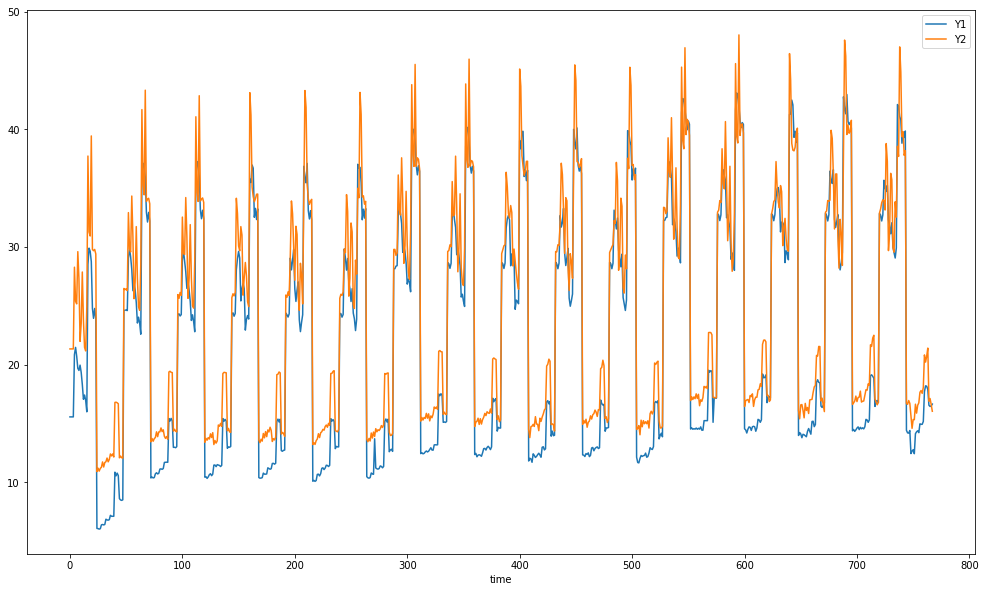

In [16]:
plt.figure(figsize=(17,10)) # зададим размер графика (17 - ширина, 10 - высота)
plt.xlabel('time') # подпись для оси X
plt.plot(df['Y1'], label='Y1') # нагрузка при обогреве
plt.plot(df['Y2'], label='Y2') # нагрузка при охлаждении
plt.legend() # отобразим легенду с вышеуказанными лейблами (справа вверху)

In [17]:
from sklearn.neighbors import KNeighborsRegressor
df_train, df_test = df[:500], df[500:] # разобьём данные таким образом, чтобы всё до 500 пошло в train, а всё остальное - в test
clf_1, clf_2 = KNeighborsRegressor(), KNeighborsRegressor() # зададим два необученных регрессора с параметрами по умолчанию
clf_1.fit(df_train.drop(['Y1', 'Y2'], 1), df_train['Y1']) # возьмём в качестве признаков всё кроме целевых переменных Y1 и Y2. Первый регрессов научим предсказывать Y1
clf_2.fit(df_train.drop(['Y1', 'Y2'], 1), df_train['Y2']) # ... второй регрессор обучим предсказывать Y2

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

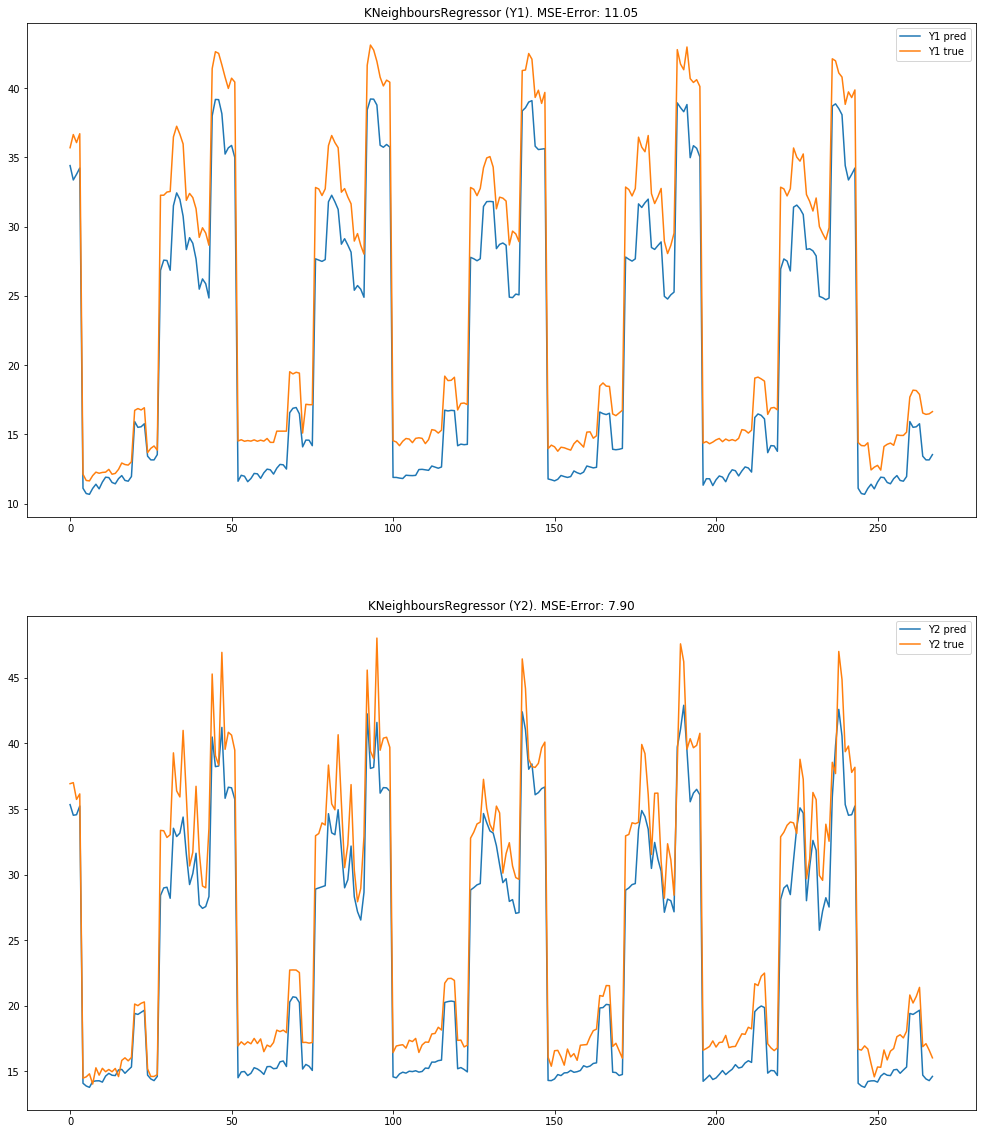

In [18]:
from sklearn.metrics import mean_squared_error

Y1_pred = clf_1.predict(df_test.drop(['Y1', 'Y2'], 1))
Y2_pred = clf_2.predict(df_test.drop(['Y1', 'Y2'], 1))
Y1_true = df_test['Y1'].values
Y2_true = df_test['Y2'].values

error_1 = mean_squared_error(Y1_pred, Y1_true)
error_2 = mean_squared_error(Y2_pred, Y2_true)

plt.figure(figsize=(17,20))
plt.subplot(211) # нарисуем сетку 2 (по высоте) X 1 (по горизонтали) и переключимся в первую ячейку
plt.title('KNeighboursRegressor (Y1). MSE-Error: %.2f' % error_1) # заголовок
plt.plot(Y1_pred, label='Y1 pred') # нарисуем предсказания для Y1 ...
plt.plot(Y1_true, label='Y1 true') # и реальные значения Y1
plt.legend()
plt.subplot(212) # нарисуем сетку 2 (по высоте) X 1 (по горизонтали) и переключимся во вторую ячейку
plt.title('KNeighboursRegressor (Y2). MSE-Error: %.2f' % error_2)
plt.plot(Y2_pred, label='Y2 pred') # нарисуем предсказания для Y2 ...
plt.plot(Y2_true, label='Y2 true') # и реальные значения Y2
plt.legend()

# Задание
Повторите то же самое для формулы Надарая-Ватсона. Проанализируйте результаты. Что на Ваш вгляд работает лучше, и почему?

In [19]:
!pip install git+https://github.com/jmetzen/kernel_regression
# установим готовую реализацию для Надарая-Ватсона

  Cloning https://github.com/jmetzen/kernel_regression to c:\users\public\documents\iskysoft\creatortemp\pip-_ae_zusp-build


You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [20]:
from kernel_regression import *
clf = KernelRegression()

# Полезные ссылки
* [Пример](https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/) с Iris и KNN
* [Пример](https://habrahabr.ru/post/206306/) решения задачи регрессии